ID: C191245 , CSE-48'BF


**Exploratory Data Analysis (EDA)**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data= pd.read_excel('/content/news_share_data.xlsx')
print(data.shape)
data.head()

(1003, 22)


,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


In [ ]:
# Display basic statistics of the dataset
print(data.describe())

         article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.526890    11.720837     5.188435   
std    4.823885e+05            0.118793    15.181597     8.495002   
min    2.195051e+06            0.000000     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.867925   162.000000    84.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           1003.000000   1003.000000  1003.000000   
mean      1.215354              4.603757      7.206381  1131.437972   
std       4.079730              0.701756      1.856713  1181.134621   
min       0.000000              0.000000      2.000000     0.000000   
25%       0.000000     

<ipython-input-90-ace8bcb57aa3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


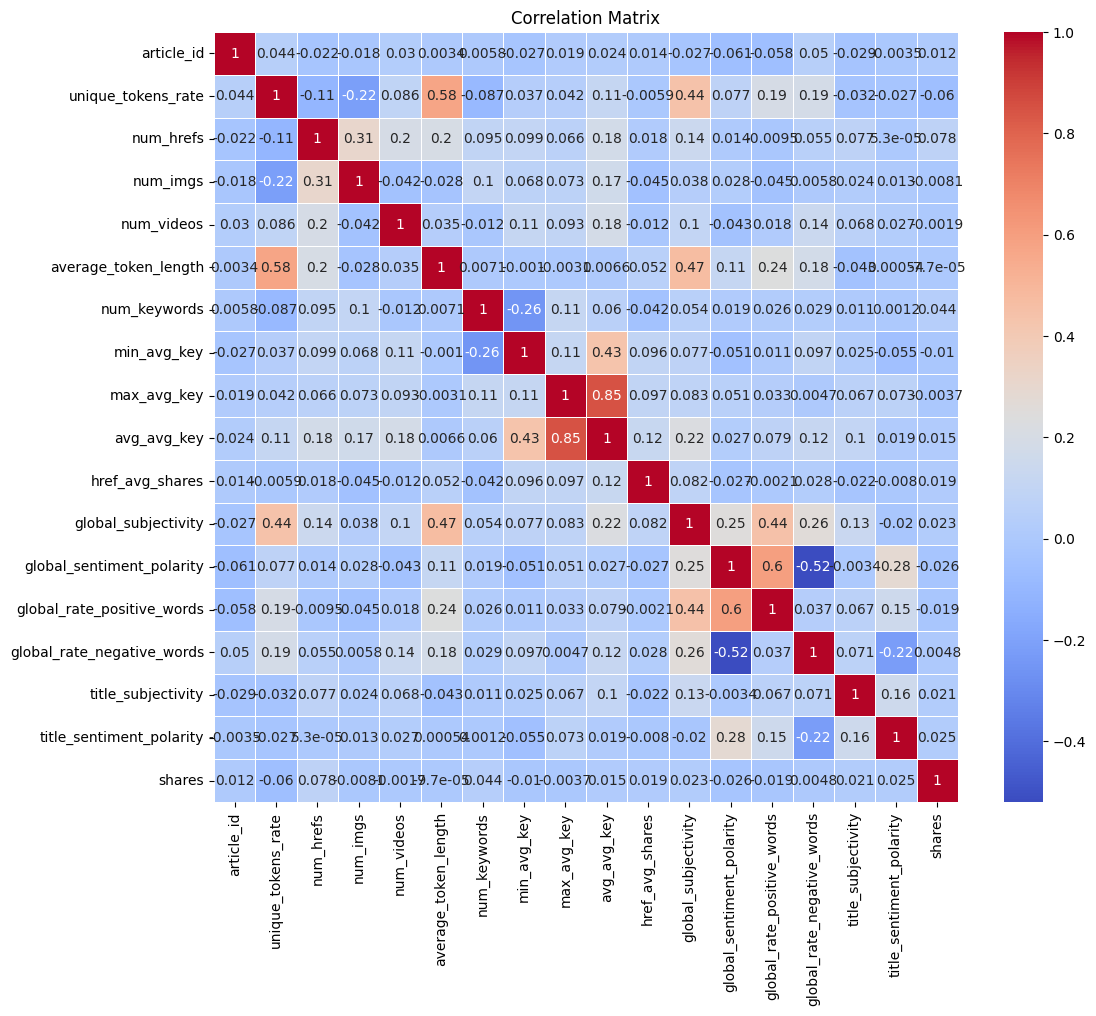

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
missing_values = data.isnull().sum()
missing_values

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

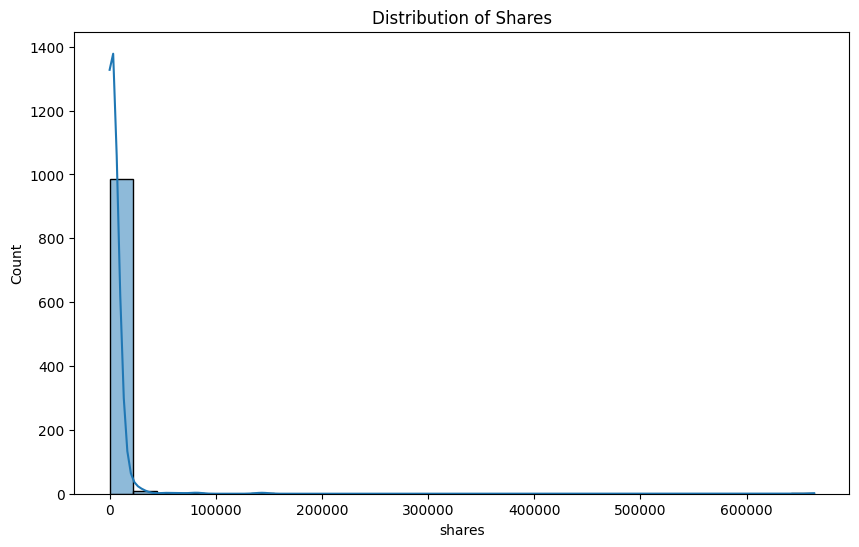

In [ ]:
# Distribution of shares
plt.figure(figsize=(10, 6))
sns.histplot(data['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.show()

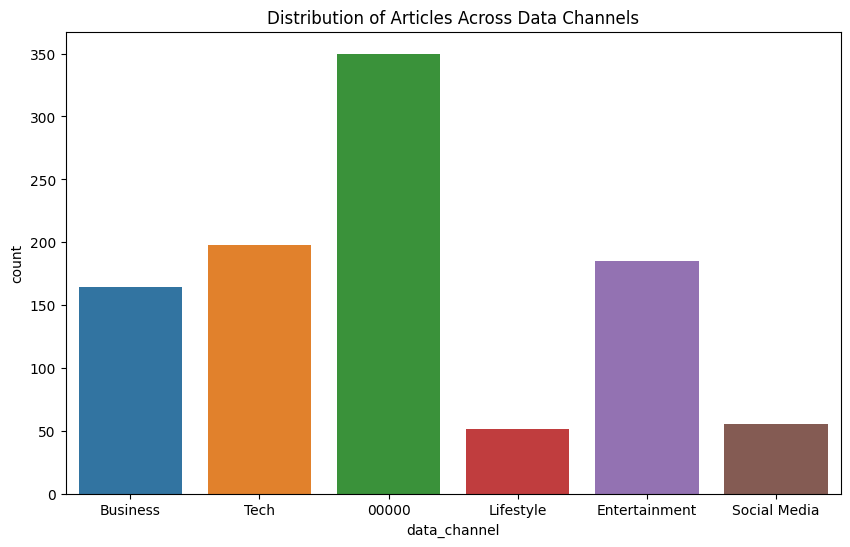

In [ ]:
# Explore data channel distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='data_channel', data=data)
plt.title('Distribution of Articles Across Data Channels')
plt.show()

**Feature Engineering**

In [ ]:
# Extract weekday and weekend features from published_date
data['published_date'] = pd.to_datetime(data['published_date'])
data['weekday'] = data['published_date'].dt.dayofweek
data['is_weekend'] = data['weekday'].isin([5, 6]).astype(int)

In [ ]:
# Number of tokens in title and content
data['num_tokens_title'] = data['title'].apply(lambda x: len(str(x).split()))
data['num_tokens_content'] = data['text'].apply(lambda x: len(str(x).split()))

In [ ]:
# Display the updated dataset
print(data.head())

   article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1   

**Data Preprocessing**

In [ ]:
# Drop irrelevant columns
data = data.drop(['article_id', 'published_date', 'data_channel', 'title', 'text'], axis=1)

In [ ]:
# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['weekday'])

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = data.drop('shares', axis=1)
y = data['shares']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Build & Evaluation Regression Models**

***Linear Regression***

In [ ]:
# Model training
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(X_train,y_train)))

Training R2 score: 0.08325421263231503


In [ ]:
# Predicting on the test and evaluating the accuracy
preds_lreg = linear_reg.predict(X_test)


print("Test MSE: "+ str(metrics.mean_squared_error(y_test,preds_lreg)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lreg))))
print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lreg)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lreg)))

Test MSE: 2191992148.4407845
Test RMSE: 46818.715792306655
Test R2 score: -0.0073924549333743705
Test MAE: 6652.971745280011


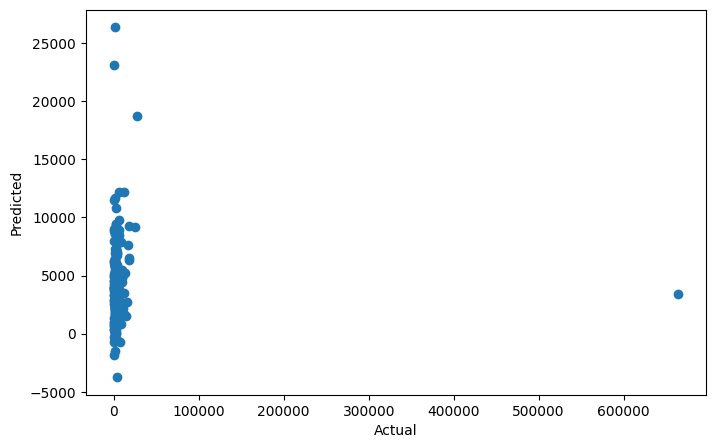

In [ ]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lreg)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

***Lasso Regression (L1 Regularization)***

In [ ]:
# Model training
las = Lasso()
las.fit(X_train,y_train)
print("Training R2 score: "+ str(las.score(X_train,y_train)))

Training R2 score: 0.08325335354695806


In [ ]:
# Predicting on the test and evaluating the accuracy
preds_lasreg = las.predict(X_test).reshape(-1,1)

print("Test MSE: "+ str(metrics.mean_squared_error(y_test,preds_lasreg)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lasreg))))
print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lasreg)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lasreg)))

Test MSE: 2191932106.94881
Test RMSE: 46818.07457541169
Test R2 score: -0.007364861154792068
Test MAE: 6649.605734652578


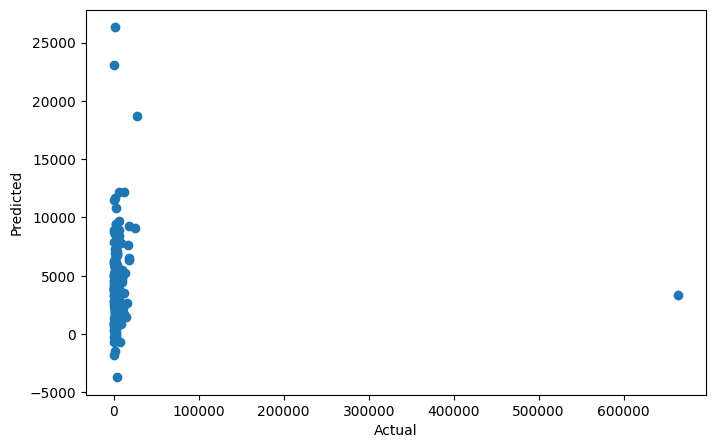

In [ ]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lasreg)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

***Ridge Regression (L2 Regularization)***

In [ ]:
# Model training
ridge = Ridge()
ridge.fit(X_train,y_train)
print("Training R2 score: "+ str(ridge.score(X_train,y_train)))

Training R2 score: 0.08324814498062205


In [ ]:
# Predicting on the test and evaluating the accuracy
preds_ridreg = ridge.predict(X_test)

print("Test MSE: "+ str(metrics.mean_squared_error(y_test,preds_ridreg)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_ridreg))))
print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_ridreg)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_ridreg)))

Test MSE: 2191867736.414925
Test RMSE: 46817.38711648617
Test R2 score: -0.007335277841639343
Test MAE: 6645.599277516487


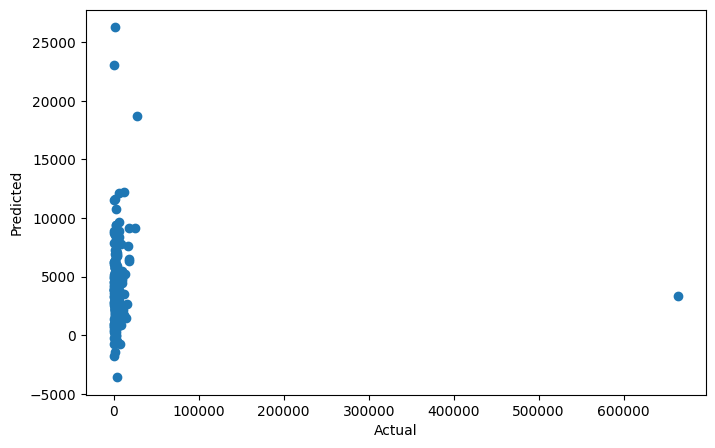

In [ ]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_ridreg)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

***Ensemble***

In [ ]:
# Model training
estimators = [('lreg',linear_reg),('lasreg',las),('ridreg',ridge)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(X_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(X_train,y_train)))

Training R2 score: 0.0832530195910911


In [ ]:
# Predicting on the test and evaluating the accuracy
preds_vote = voting_ensemble.predict(X_test)

print("Test MSE: "+ str(metrics.mean_squared_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))
print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))

Test MSE: 2191930517.2720547
Test RMSE: 46818.05759823932
Test R2 score: -0.0073641305735396845
Test MAE: 6649.392252483025


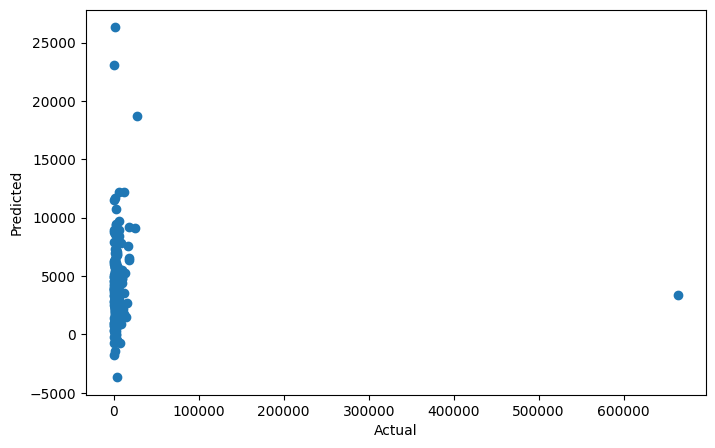

In [ ]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()